## cellprofiler-example

(adapted from Allen Goodman's  https://gist.github.com/0x00b1/cb4d32653051fe7dc7b711de14b11688)

In [1]:
import cellprofiler_core.image
import cellprofiler_core.object
import cellprofiler_core.pipeline
import cellprofiler_core.preferences
import cellprofiler_core.workspace
import cellprofiler.modules.gaussianfilter
import skimage.data

In [2]:
cellprofiler_core.preferences.set_headless()

### Create a `Pipeline` instance

In [3]:
pipeline = cellprofiler_core.pipeline.Pipeline()

### Create a `Module` instance

In [4]:
module = cellprofiler.modules.gaussianfilter.GaussianFilter()

### Create `ImageSetList` and `ImageSet` instances

In [5]:
image_set_list = cellprofiler_core.image.ImageSetList()

image_set = image_set_list.get_image_set(0)

### Create `Image` instances, name and add them to the `ImageSet` instance

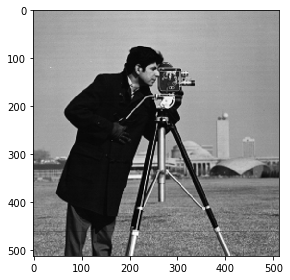

In [6]:
x = skimage.data.camera()

image_x = cellprofiler_core.image.Image(x)

image_set.add("x", image_x)

skimage.io.imshow(image_set.get_image("x").pixel_data)

### Create an `ObjectSet` instance, name and add an `Objects` instance

In [7]:
object_set = cellprofiler_core.object.ObjectSet()

objets  = cellprofiler_core.object.Objects()

object_set.add_objects(objets, "example")

### Create a `Measurements` instance

In [8]:
measurements = cellprofiler_core.measurement.Measurements()

### Create a `Workspace` instance

In [9]:
workspace = cellprofiler_core.workspace.Workspace(
    pipeline,
    module,
    image_set,
    object_set,
    measurements,
    image_set_list,
)

### Configure and run a `Module`

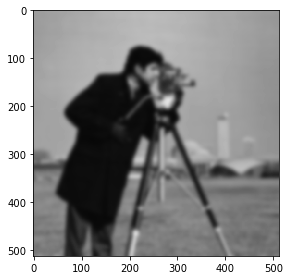

In [10]:
module.x_name.value = "x"
module.y_name.value = "y"

module.sigma.value = 4

module.run(workspace)

response = image_set.get_image("y")

skimage.io.imshow(response.pixel_data)

### Add `Module` to `Pipeline`

In [11]:
pipeline.add_module(module)

### Run `Pipeline`

In [12]:
output_measurements = pipeline.run(None)